# PTJPL for point forcing datasets
***************************************************************
    Input variables within DATAFRAME:     
        net_radiation: instantaneous net radiation in (W/m2)
        RH_day: daily relative humidity(%)
        air_temperature: air temperature near the surface (K) 
        ndvi_mean: average Normalized Difference Vegetation Index for day
        
    Returned:
        A dataset is returned from this script containing the following variables:
        evapotranspiration: total evapotranspiration (W/m2)
        interception_evaporation: intercepted evaporation (W/m2) 
        soil_evaporation: evaporation from soil (W/m2)
        canopy_transpiration: transpiration from canopy (W/m2)                       
        potential_evapotranspiration: potential evapotranspiration (W/m2)
        
***************************************************************


In [15]:
import datetime
import glob
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import exp, log
import os
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [16]:
# FILE PATHWAYS
data_path = r'C:\GitWork\H8AHI_ET\test\PTJPL_AMATERASS'

In [17]:
# ----------------------- MODEL IS IN THE LIBRARY REFERENCED HERE ---------------------- 
from ptjpl_ahi import *
# ----------------------------- NOTEBOOK SPECIFIC COMMANDS ----------------------------- 
# % matplotlib inline
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

datMMS = pd.read_csv(data_path + '/AMATERASS_TKY_hourly.csv')
df_MMS = datMMS.set_index('Time')

In [18]:
df_MMS

,TA,TA_day_mean,NDVI_day_mean,NETRAD,NETRAD_day,RH_hour_min,TA_day_max
Time,,,,,,,
2018/07/19 03:00,291.673735,297.886087,0.9,0.000000,492.885847,56.035255,302.80328
2018/07/19 04:00,291.241818,297.886087,0.9,0.000000,492.885847,71.292540,302.80328
2018/07/19 05:00,291.679920,297.886087,0.9,91.714373,492.885847,81.716835,302.80328
2018/07/19 06:00,293.589172,297.886087,0.9,286.685888,492.885847,80.105250,302.80328
2018/07/19 07:00,295.623050,297.886087,0.9,490.733530,492.885847,69.691160,302.80328
2018/07/19 08:00,297.083654,297.886087,0.9,677.884882,492.885847,63.878426,302.80328
2018/07/19 09:00,298.752290,297.886087,0.9,835.840304,492.885847,49.309383,302.80328
2018/07/19 10:00,299.724496,297.886087,0.9,944.782988,492.885847,43.867700,302.80328
2018/07/19 11:00,300.519097,297.886087,0.9,998.201140,492.885847,40.507870,302.80328


In [19]:
df_model_MMS = ptjpl(df_MMS)

calculating surface wetness values [%]
calculating vapor pressure deficit [kPa]
calculating vegetation values
calculating plant optimum temperature
302.80328 C
calculating soil evaporation
calculating canopy transpiration
calculating interception evaporation
combining evapotranspiration
calculating daily evapotranspiration
calculating potential evapotranspiration


In [20]:
df_model_MMS

,TA,TA_day_mean,NDVI_day_mean,NETRAD,NETRAD_day,RH_hour_min,TA_day_max,RH_roll,fAPAR,fIPAR,VPD_roll,soil_moisture_constraint,savi,VPD,evapotranspiration,potential_evapotranspiration,canopy_transpiration,interception_evaporation,soil_evaporation
Time,,,,,,,,,,,,,,,,,,,
2018/07/19 03:00,291.673735,297.886087,0.9,0.000000,492.885847,56.035255,302.80328,0.560353,0.684038,0.85,1.380285,0.449578,0.537,1.380285,0.000000,0.000000,0.000000,0.000000,0.000000
2018/07/19 04:00,291.241818,297.886087,0.9,0.000000,492.885847,71.292540,302.80328,0.712925,0.684038,0.85,0.901279,0.597427,0.537,0.901279,0.000000,0.000000,0.000000,0.000000,0.000000
2018/07/19 05:00,291.679920,297.886087,0.9,91.714373,492.885847,81.716835,302.80328,0.817168,0.684038,0.85,0.574005,0.709040,0.537,0.574005,48.660783,74.650247,13.344048,30.983707,4.333028
2018/07/19 06:00,293.589172,297.886087,0.9,286.685888,492.885847,80.105250,302.80328,0.801052,0.684038,0.85,0.624601,0.754013,0.537,0.624601,152.473133,241.169406,45.766965,92.431951,14.274217
2018/07/19 07:00,295.623050,297.886087,0.9,490.733530,492.885847,69.691160,302.80328,0.696912,0.684038,0.85,0.951554,0.745257,0.537,0.951554,222.442381,426.293712,105.084729,93.599965,23.757687
2018/07/19 08:00,297.083654,297.886087,0.9,677.884882,492.885847,63.878426,302.80328,0.638784,0.684038,0.85,1.134047,0.722618,0.537,1.134047,286.976237,601.533744,161.748501,93.225089,32.002648
2018/07/19 09:00,298.752290,297.886087,0.9,835.840304,492.885847,49.309383,302.80328,0.493094,0.684038,0.85,1.591446,0.668385,0.537,1.591446,308.145985,758.658061,230.280154,41.746525,36.119305
2018/07/19 10:00,299.724496,297.886087,0.9,944.782988,492.885847,43.867700,302.80328,0.438677,0.684038,0.85,1.762289,0.613160,0.537,1.762289,337.352256,868.226674,269.724300,29.927371,37.700585
2018/07/19 11:00,300.519097,297.886087,0.9,998.201140,492.885847,40.507870,302.80328,0.405079,0.684038,0.85,1.867772,0.561918,0.537,1.867772,350.763960,926.268196,290.775758,23.214021,36.774181


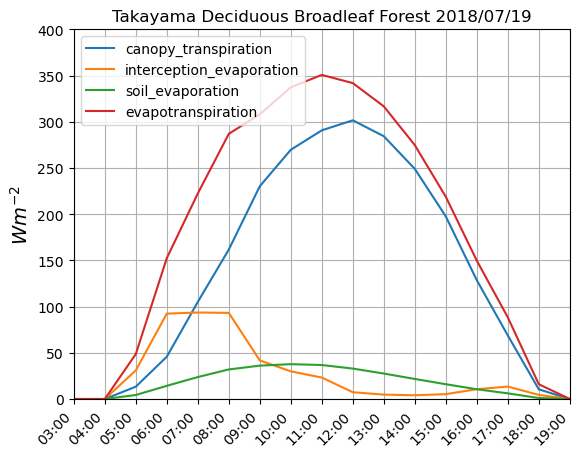

In [21]:
plt.figure()
plt.plot(df_model_MMS.canopy_transpiration, label='canopy_transpiration')
plt.plot(df_model_MMS.interception_evaporation, label='interception_evaporation')
plt.plot(df_model_MMS.soil_evaporation, label='soil_evaporation')
plt.plot(df_model_MMS.evapotranspiration, label='evapotranspiration')
time_list = np.array(df_model_MMS.index)
time_list_s = [t_item[-5:] for t_item in time_list]
plt.xticks(ticks=np.arange(len(time_list)), labels=time_list_s, rotation=45, ha='right')
plt.xlim(0,len(time_list)-1)
plt.ylim(0, 400)
plt.legend()
plt.ylabel('$Wm^{-2}$', fontsize=14)
plt.title('Takayama Deciduous Broadleaf Forest 2018/07/19')
plt.grid(True)